# Data Exploration

Each numpy array corresponds to all earthquakes on a particular day, of the form
(stations, events, 3 (axes), 6000 (time))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_path = '../arrays/2019-08-01.npy'
data = np.load(data_path)
data.shape

(27, 196, 3, 6000)

In [17]:
#Helper function to plot an earthquake
def plot_earthquake(quake):
    num_stations, num_dims, time = quake.shape
    fig, axs = plt.subplots(num_stations, figsize = (20, 10*num_stations))
    for station_num in range(num_stations):
        axs[station_num].plot(np.arange(time), quake[station_num].T)

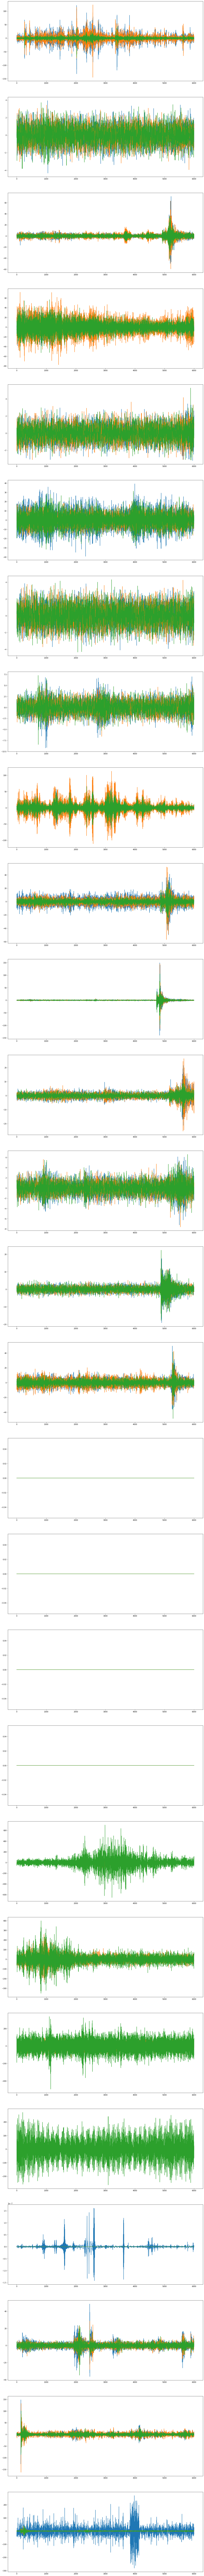

In [18]:
plot_earthquake(data[:, 0])

In [2]:
freq = 100
window = 2000
vp = 6.5 
vs = 4.5
t = np.arange(window)/freq
channel = 2
degree2km = np.pi*6371/180
for event in data['events']:
  tmp_dist = []
  plt.figure(figsize=(15, 10))
  for sta in data['stations']:
    istart = int(freq * (event['time'] - data['stations'][sta]['starttime']))
    dist = np.sqrt((event['x'] - data['stations'][sta]['x'])**2 + (event['y'] - data['stations'][sta]['y'])**2 + event['depth']**2)
    tmp_dist.append(dist)
    tmp_data = data['stations'][sta]['data'][istart:istart+window,channel]
    mean = np.mean(tmp_data)
    std = np.std(tmp_data)
    plt.plot(t, (tmp_data - mean)/std/2 + dist, 'grey', linewidth=1)
#     plt.plot(t, tmp_data/std/2 + dist)
  plt.plot(t, t*vp, '--b', label="vp = 6.5 km/s")
  plt.plot(t, t*vs, '--r', label="vs = 4.5 km/s")
  plt.legend(loc="lower right")
  plt.xlim([0, window/freq])
  plt.ylim([min(tmp_dist)-10, max(tmp_dist)+10])
  plt.title('Magnitude: {}, Time: {}'.format(event['mag'], str(event['time'])))
  plt.ylabel('Distance from hypocenter (km)')
  plt.xlabel('Time after earthquake (s)')
  plt.savefig(figure_dir.joinpath("{}.png".format(event['time'])))
  plt.show()

NameError: name 'data' is not defined

In [20]:
import pickle
with open('../data/Ridgecrest/2019-06-07.pkl', 'rb') as f:
    data = pickle.load(f)

In [23]:
data['events'], len(data['events'])

([{'time': 2019-06-07T00:01:33.530000Z,
   'mag': 0.71,
   'mag_type': 'Ml',
   'lat': 36.1203333,
   'lng': -117.6678333,
   'depth': 2.6,
   'x': 37.38003154684414,
   'y': 101.7804191488219,
   'z': 2.6},
  {'time': 2019-06-07T07:37:49.760000Z,
   'mag': 1.13,
   'mag_type': 'Ml',
   'lat': 36.1566667,
   'lng': -117.8636667,
   'depth': 3.49,
   'x': 15.60435099928984,
   'y': 105.82050889656973,
   'z': 3.49},
  {'time': 2019-06-07T12:15:21.070000Z,
   'mag': 1.26,
   'mag_type': 'Ml',
   'lat': 36.1566667,
   'lng': -117.8596667,
   'depth': 2.55,
   'x': 16.04913070586704,
   'y': 105.82050889656973,
   'z': 2.55},
  {'time': 2019-06-07T19:31:41.150000Z,
   'mag': 0.93,
   'mag_type': 'Ml',
   'lat': 36.0841667,
   'lng': -117.8406667,
   'depth': 2.25,
   'x': 18.161834312114262,
   'y': 97.75887671483866,
   'z': 2.25}],
 4)

In [24]:
data["stations"], len(data['stations'])

({'CI.CCC.': {'lat': 35.52495,
   'lng': -117.36453,
   'x': 71.10581974139629,
   'y': 35.57681677992641,
   'starttime': 2019-06-06T23:59:59.998300Z,
   'endtime': 2019-06-07T23:59:59.998300Z,
   'data': array([[  0.        ,   0.        ,   0.        ],
          [ 65.39944458,  38.96670914,  50.64352036],
          [ 75.15858459,  52.37454605,  46.93500137],
          ..., 
          [ -8.3272419 ,  -1.69981313,  -0.10824977],
          [ -1.98967993,  -5.64858437,  -0.49339122],
          [ 31.27823257,  12.48762894,   3.33388066]])},
  'CI.CLC.': {'lat': 35.81574,
   'lng': -117.59751,
   'x': 45.19962573174725,
   'y': 67.91118949889778,
   'starttime': 2019-06-06T23:59:59.998300Z,
   'endtime': 2019-06-07T23:59:59.998300Z,
   'data': array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
          [ -6.61801910e+01,  -1.88300686e+01,  -3.06657135e+02],
          [ -7.53505630e+01,  -2.49503632e+01,  -3.02600708e+02],
          ..., 
          [ -5.21736383e-01,   9.0056

In [31]:
data['stations']['CI.WVP2.']['data'].shape

(8640001, 3)

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=1200000,height=900000,projection='lcc',
            resolution='f',lat_1=45.,lat_2=55,lat_0=35.705,lon_0=-117.504)
#m.shadedrelief()
plt.show()

/opt/anaconda3/envs/quakes/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


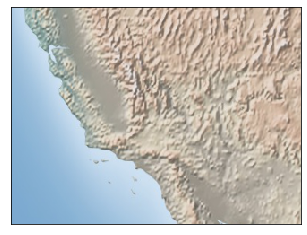

In [8]:
m.shadedrelief()
plt.show()

In [6]:
%matplotlib inline

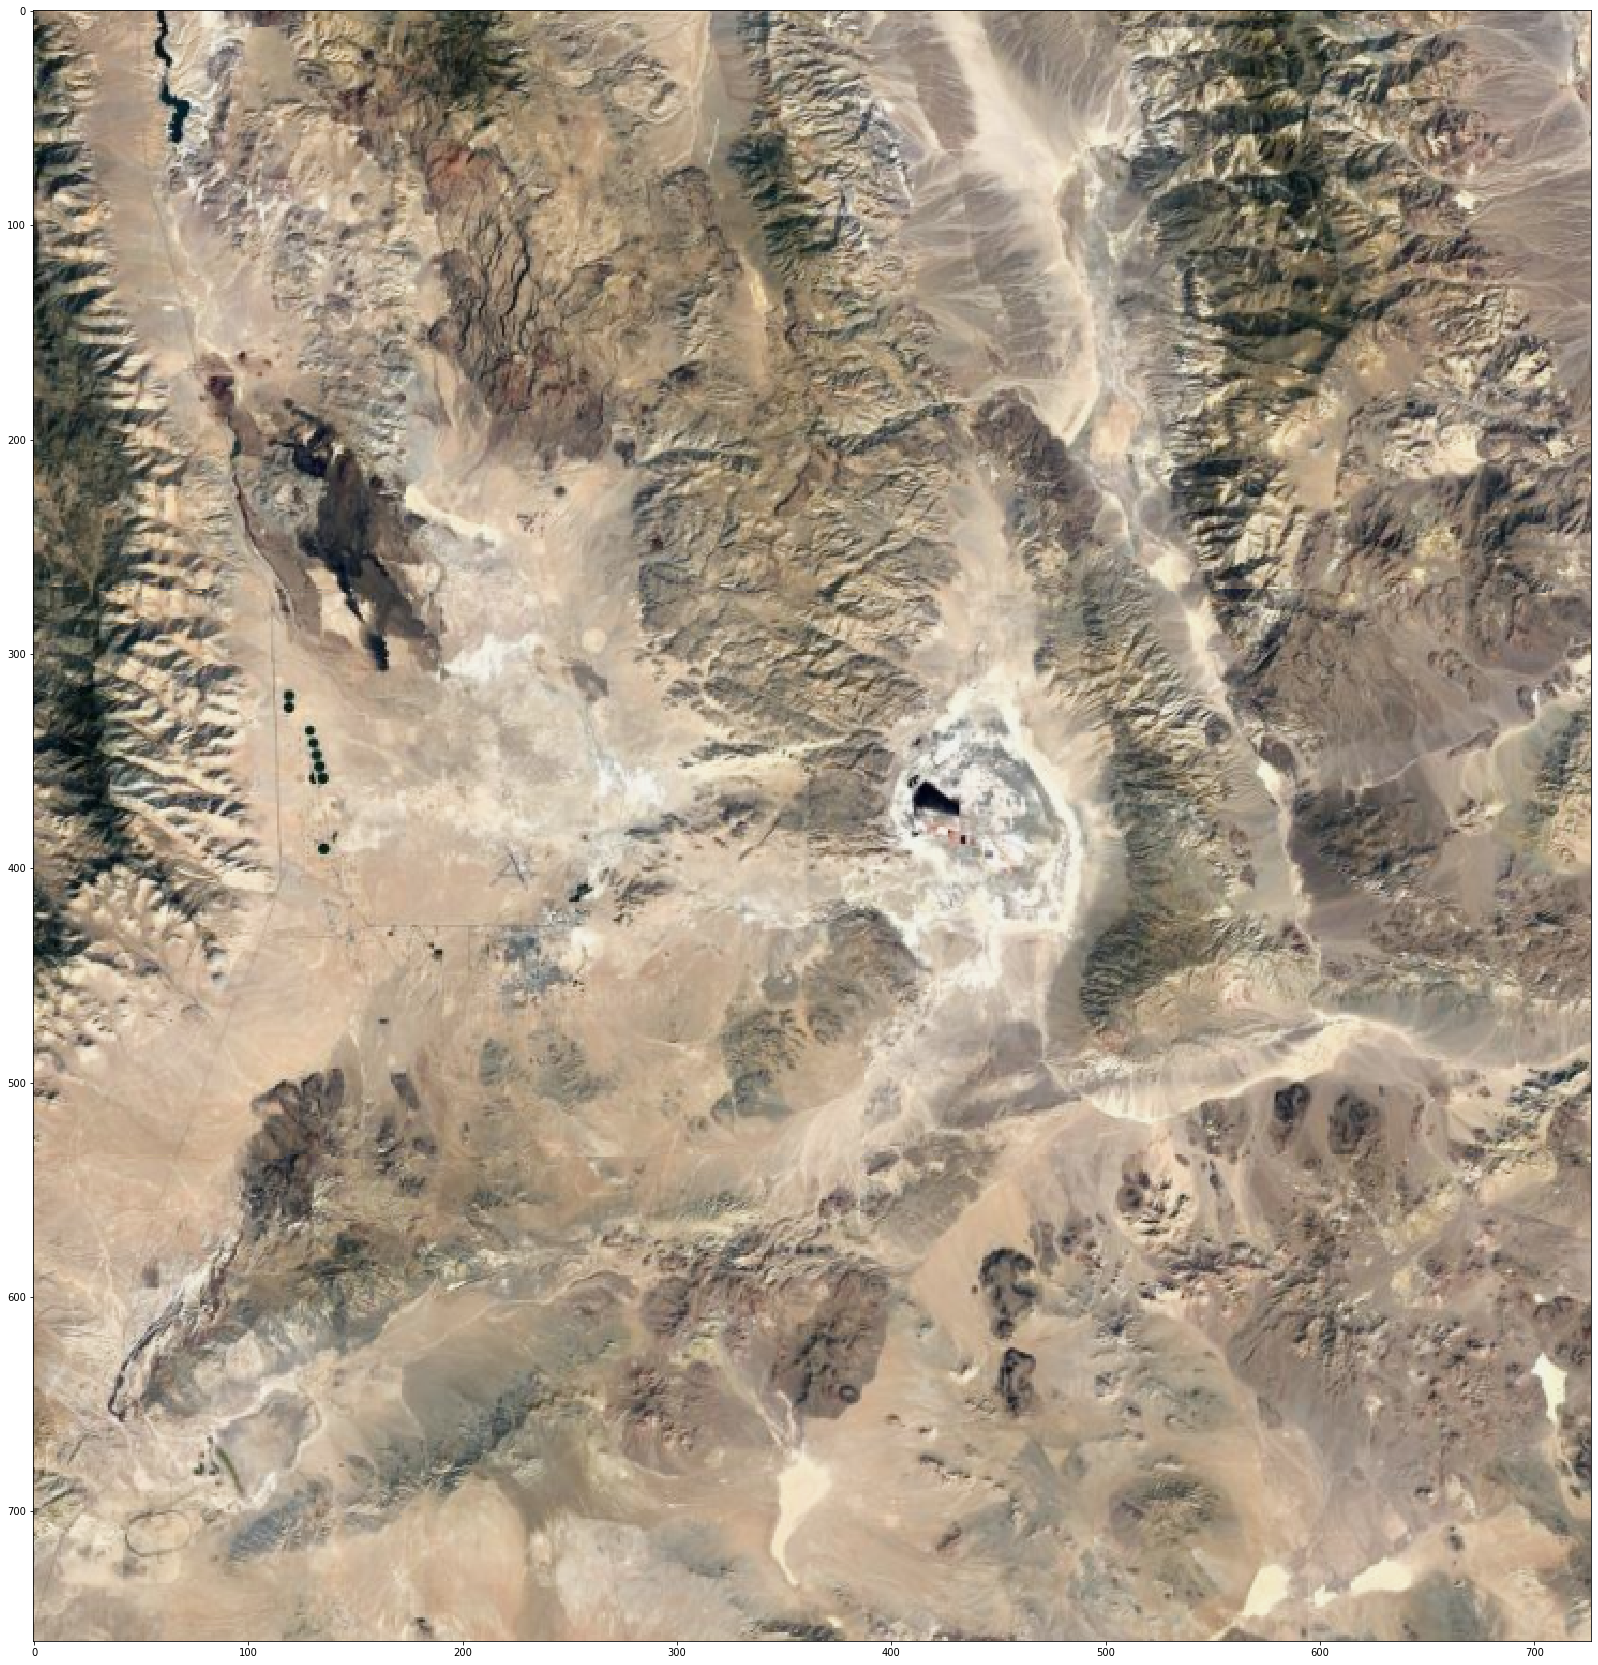

In [14]:
plt.figure(figsize=(30, 30))
img = plt.imread("ridgecrest.png")
plt.imshow(img)

In [13]:
def circles(x, y, s, c='b', vmin=None, vmax=None, **kwargs):
    """
    Make a scatter plot of circles. 
    Similar to plt.scatter, but the size of circles are in data scale.
    Parameters
    ----------
    x, y : scalar or array_like, shape (n, )
        Input data
    s : scalar or array_like, shape (n, ) 
        Radius of circles.
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs.
        Note that `c` should not be a single numeric RGB or RGBA sequence 
        because that is indistinguishable from an array of values
        to be colormapped. (If you insist, use `color` instead.)  
        `c` can be a 2-D array in which the rows are RGB or RGBA, however. 
    vmin, vmax : scalar, optional, default: None
        `vmin` and `vmax` are used in conjunction with `norm` to normalize
        luminance data.  If either are `None`, the min and max of the
        color array is used.
    kwargs : `~matplotlib.collections.Collection` properties
        Eg. alpha, edgecolor(ec), facecolor(fc), linewidth(lw), linestyle(ls), 
        norm, cmap, transform, etc.
    Returns
    -------
    paths : `~matplotlib.collections.PathCollection`
    Examples
    --------
    a = np.arange(11)
    circles(a, a, s=a*0.2, c=a, alpha=0.5, ec='none')
    plt.colorbar()
    License
    --------
    This code is under [The BSD 3-Clause License]
    (http://opensource.org/licenses/BSD-3-Clause)
    """
    from matplotlib.patches import Circle
    from matplotlib.collections import PatchCollection


    if np.isscalar(c):
        kwargs.setdefault('color', c)
        c = None

    if 'fc' in kwargs:
        kwargs.setdefault('facecolor', kwargs.pop('fc'))
    if 'ec' in kwargs:
        kwargs.setdefault('edgecolor', kwargs.pop('ec'))
    if 'ls' in kwargs:
        kwargs.setdefault('linestyle', kwargs.pop('ls'))
    if 'lw' in kwargs:
        kwargs.setdefault('linewidth', kwargs.pop('lw'))
    # You can set `facecolor` with an array for each patch,
    # while you can only set `facecolors` with a value for all.

    zipped = np.broadcast(x, y, s)
    patches = [Circle((x_, y_), s_)
               for x_, y_, s_ in zipped]
    collection = PatchCollection(patches, **kwargs)
    if c is not None:
        c = np.broadcast_to(c, zipped.shape).ravel()
        collection.set_array(c)
        collection.set_clim(vmin, vmax)

    ax = plt.gca()
    ax.add_collection(collection)
    ax.autoscale_view()
    plt.draw_if_interactive()
    if c is not None:
        plt.sci(collection)
    return collection

In [11]:
def plot_coords(lats, lngs, intensity):
    plt.figure(figsize=(30, 30))
    plt.gca().axis('off')
    img = plt.imread("ridgecrest.png")
    width = img.shape[0]
    height = img.shape[1]
    latmin = 35.205
    lngmin = -117.004
    
    #Change the x and y to adjust to coords
    y = [int((lat - latmin)*height) for lat in lats]
    x = [int((lng - lngmin)*width) for lng in lngs]

    plt.imshow(img)
    
    out = circles(x, y, intensity, c='r', alpha=0.5, edgecolor='none')
    
    plt.show()

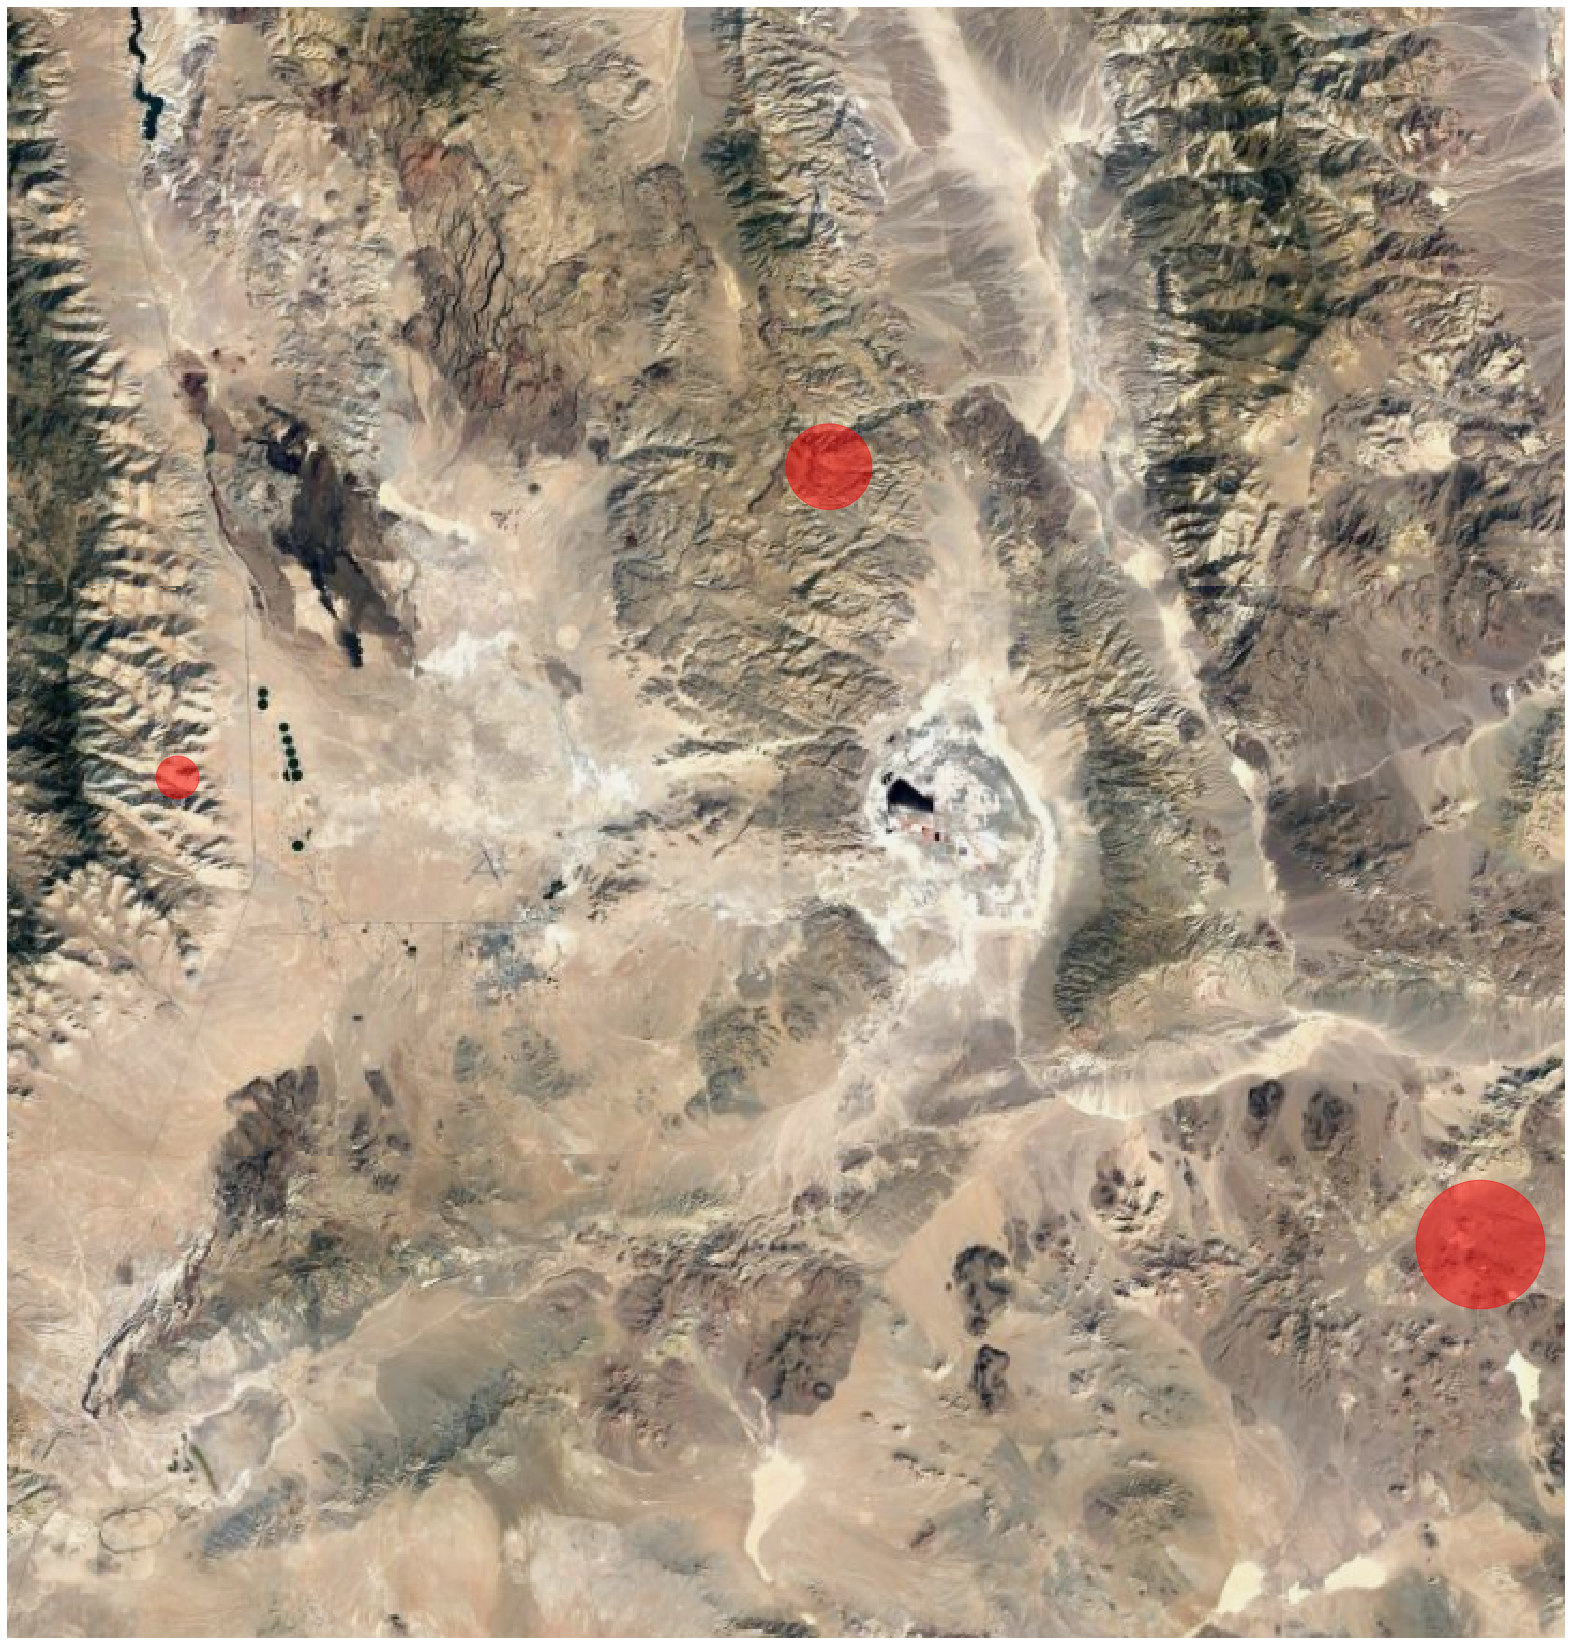

In [33]:
lats = [35.5, 35.7, 36]
lngs = [-116.5, -116.9, -116.1]
intensity = [20, 10, 30]
plot_coords(lats, lngs, intensity)

# Plot an earthquake

In [3]:
#Get the order of stations
stations = np.load("../extracted/stations.npy")
stations

array(['CI.WVP2.', 'CI.WRV2.', 'CI.WRC2.', 'CI.WNM.', 'CI.WMF.',
       'CI.WCS2.', 'CI.WBM.', 'CI.TOW2.', 'CI.SRT.', 'CI.SLA.', 'CI.MPM.',
       'CI.LRL.', 'CI.DTP.', 'CI.CCC.', 'CI.JRC2.'], dtype='<U8')

In [10]:
#Define the station coordinates
station_coords = {
"CI.CCC.": (35.52495, -117.36453),
"CI.DTP.": (35.26742, -117.84581),
"CI.JRC2.": (35.98249, -117.80885),
"CI.LRL.": (35.47954, -117.68212),
"CI.MPM.": (36.05799 ,-117.48901),
"CI.Q0072.": (35.609617, -117.666721),
"CI.SLA.": (35.89095, -117.28332),
"CI.SRT.": (35.69235, -117.75051),
"CI.TOW2.": (35.80856, -117.76488),
"CI.WBM.": (35.60839, -117.89049),
"CI.WCS2.": (36.02521, -117.76526),
"CI.WMF.": (36.11758, -117.85486),
"CI.WNM.": (35.8422, -117.90616),
"CI.WRC2.": (35.9479, -117.65038),
"CI.WRV2.": (36.00774, -117.8904),
"CI.WVP2.": (35.94939, -117.81769)
}

lats = [station_coords[s][0] for s in stations]
lngs = [station_coords[s][1] for s in stations]
intensity = [10]*len(lngs)
lats, lngs

([35.94939,
  36.00774,
  35.9479,
  35.8422,
  36.11758,
  36.02521,
  35.60839,
  35.80856,
  35.69235,
  35.89095,
  36.05799,
  35.47954,
  35.26742,
  35.52495,
  35.98249],
 [-117.81769,
  -117.8904,
  -117.65038,
  -117.90616,
  -117.85486,
  -117.76526,
  -117.89049,
  -117.76488,
  -117.75051,
  -117.28332,
  -117.48901,
  -117.68212,
  -117.84581,
  -117.36453,
  -117.80885])

In [9]:
# Import a single dat of earthquakes
quakes = np.load("../extracted/2019-06-04.npy")
quakes.shape

(4, 15, 3, 6000)

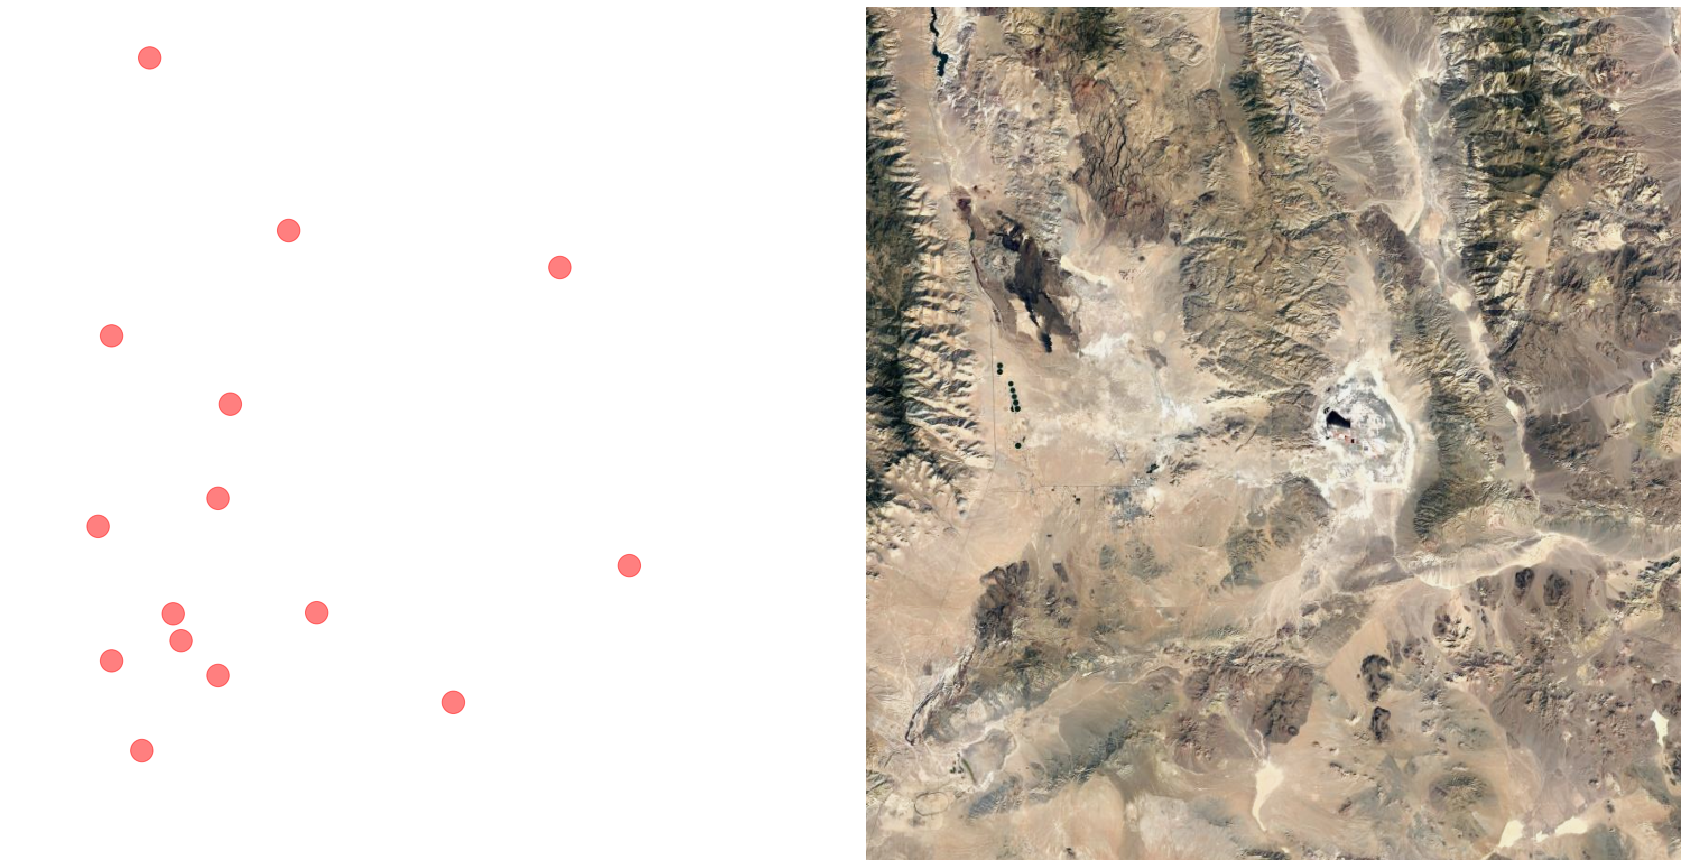

In [14]:
plot_coords(lats, lngs, intensity)